# Bibliotecas e CSV

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\cotoq\\PycharmProjects\\Teste_Analytics_MarcusGuerra\\data-sets\\data_clean.csv')

#como o pandas não salva o df com o tipo datetime, ele volta a ser string, devemos transformar em datetime novamente
df['Data'] = pd.to_datetime(df['Data'])

# Funções

para facilitar a visualisação dos graficos e deixar o notebook menos poluido, todas as funções para gerar os gráficos serão armazenadas aqui

In [5]:
def plot_vendas_mensais(df):
    #para evitar poluir o df original, podendo gerar problemas com outras visualisações, e como esse é um df pequeno, podemos fazer uma cópia dele e trabalhar apenas com a cópia
    df_plot_venda = df

    #dividir o total de vendas por 1 milhão para facilitar a visualização
    df_plot_venda['VendasMilhao'] = df_plot_venda['Vendas'] / 1e6

    df_plot_venda['Ano_Mes'] = df_plot_venda['Data'].dt.to_period('M')

    vendas_mensais = df_plot_venda.groupby('Ano_Mes')['VendasMilhao'].sum()

    vendas_mensais.index = vendas_mensais.index.strftime('%b')

    media_vendas = vendas_mensais.mean()

    plt.figure(figsize=(10, 6))

    plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='b', label='Vendas Mensais')

    for i in range(len(vendas_mensais)):
        if vendas_mensais.iloc[i] < media_vendas:
            plt.plot(vendas_mensais.index[i], vendas_mensais.iloc[i], marker='o', color='r')  # Vermelho para abaixo da média
        else:
            plt.plot(vendas_mensais.index[i], vendas_mensais.iloc[i], marker='o', color='b')  # Azul para acima da média


    plt.xticks(ticks=range(len(vendas_mensais)), labels=vendas_mensais.index, rotation=45, ha='right')

    plt.title('Tendência de Vendas 2023 (em milhões)', fontsize=26)

    # Formata o eixo Y para facilitar a compreensão dos valores
    formatter = FuncFormatter(lambda x, pos: f'{int(x):,}M')
    plt.gca().yaxis.set_major_formatter(formatter)

    #adiciona a legenda colorida
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Acima da Média'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Abaixo da Média')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()

    plt.grid(True)

    plt.show()

#  Análise Exploratória

# Boxplot

In [12]:
def plot_boxplot_vendas_por_categoria(df):
    # Gerar uma paleta de cores distintas
    categorias = df['Categoria'].unique()
    palette = sns.color_palette("Set2", len(categorias))  # Paleta de cores distintas

    # Criar a figura
    plt.figure(figsize=(10, 6))

    # Criar o boxplot, utilizando a paleta de cores para cada categoria
    sns.boxplot(x='Categoria', y='Vendas', data=df, hue='Categoria', palette=palette, dodge=False)

    # Título do gráfico
    plt.title('Distribuição das Vendas por Categoria', fontsize=16)

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

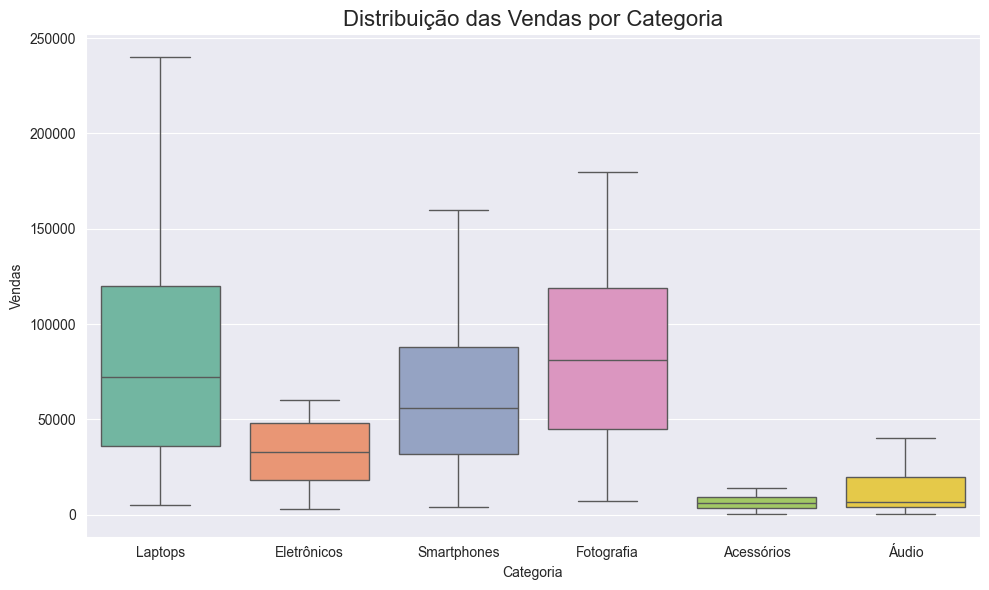

In [13]:
plot_boxplot_vendas_por_categoria(df)

##  Tendência de Vendas ao Longo do Tempo

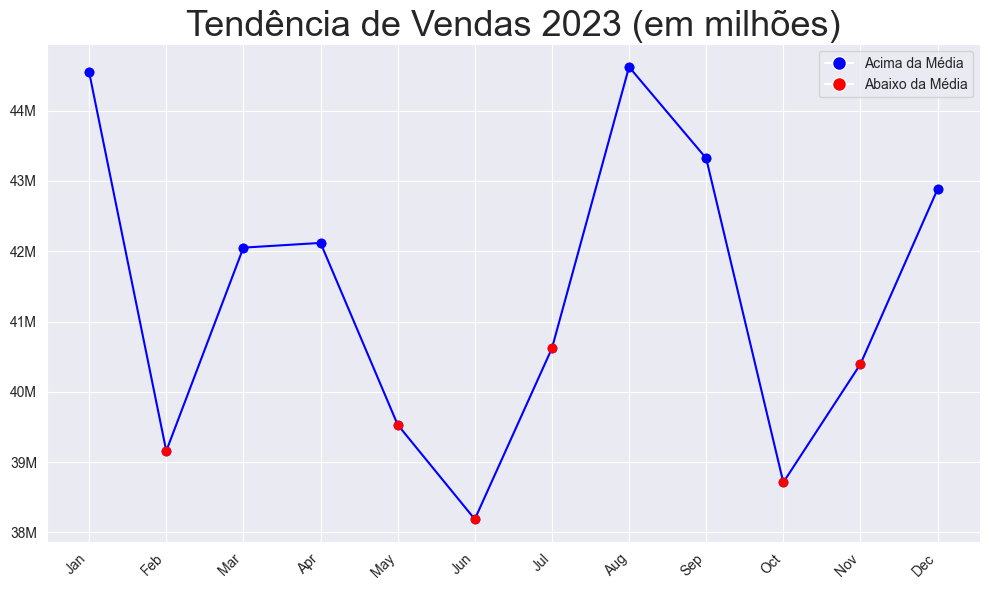

In [8]:
plot_vendas_mensais(df)